11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Accuracy: 91.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.91      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.91      0.95      0.93       982
           5       0.88      0.84      0.86       892
           6       0.95      0.93      0.94       958
           7       0.92      0.91      0.92      1028
           8       0.88      0.85      0.87       974
           9       0.91      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Confusion Matrix:
[[ 953    0    4    0    0   12    7    1    2    1]
 [   0 1111    3    2    0    1    3    4   11    0]
 [  12    4  934   22   

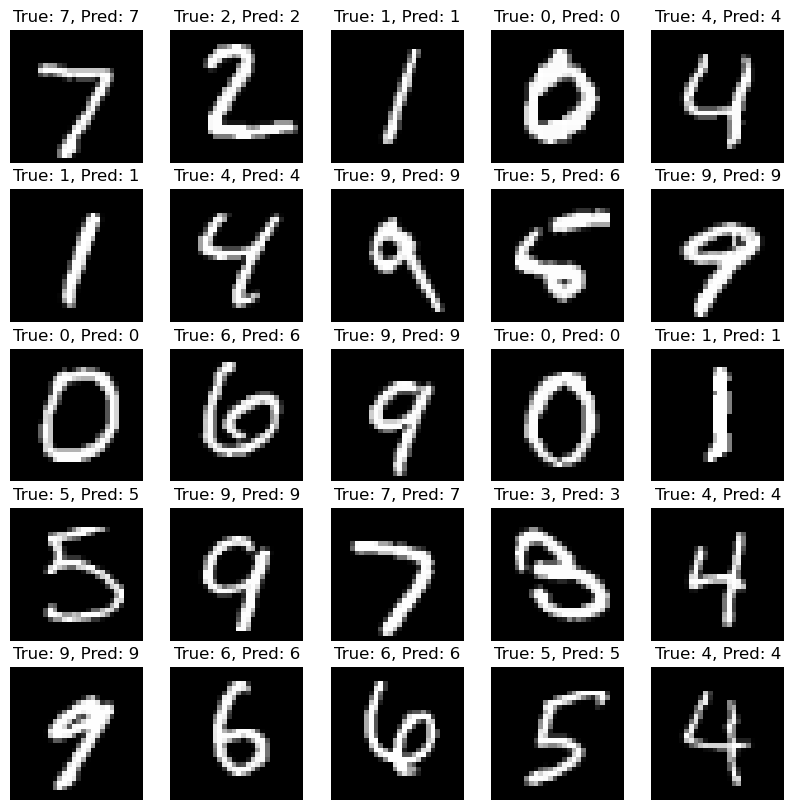

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
from tensorflow.keras.datasets import mnist

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Use a subset for quicker training
subset_size = 10000
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot some test images with their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()
